In [1]:
import os
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import utils

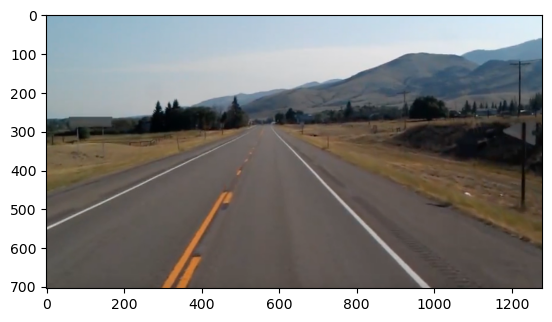

In [2]:
img =  cv.imread('./assets/images/road.jpg')
plt.imshow(img[...,::-1])

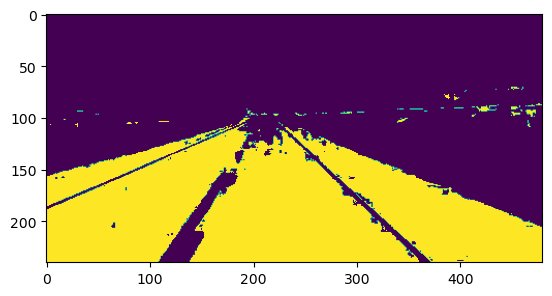

In [3]:
# Convert RGB to HSV
img = cv.resize(img, (480, 240))
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

threshold_img = utils.thresholding(img, 0, 0, 62, 36, 54, 110)
plt.imshow(threshold_img)

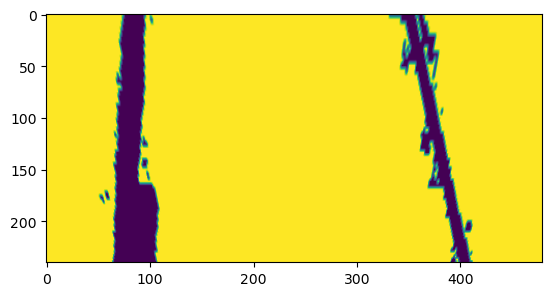

In [4]:
# Warp img to birds-eye view
h, w, c = img.shape
warped_img = utils.warp_img(threshold_img, [[116, 175],[364, 175],[ 66, 232],[414, 232]], w, h)
plt.imshow(warped_img)

In [5]:
base_point, img_hist = utils.get_histogram(warped_img, display=True)
cv.imshow('histogram', img_hist)

[61200 61200 61200 61200 61200 61200 61200 61200 61200 61200 61200 61200
 61200 61200 61200 61200 61200 61200 61200 61200 61200 61200 61200 61200
 61200 61200 61200 61200 61200 61200 61200 61200 61200 61200 61200 61200
 61200 61200 61200 61200 61200 61200 61200 61200 61200 61200 61200 61200
 61200 61200 61200 61035 60510 60237 60040 60209 60759 60413 59618 59428
 60020 60851 61184 61191 60657 57376 49118 38856 30654 23602 18600 15211
 10151  4725  1660   434    26     0     0     0     0     0     0     0
     0     0     0     3   464  2673  5830  9415 13369 15048 18457 27756
 36074 38817 39695 40752 41390 40918 40868 42136 42908 44242 48314 53806
 58581 60867 61198 61200 61200 61200 61200 61200 61200 61200 61200 61200
 61200 61200 61200 61200 61200 61200 61200 61200 61200 61200 61200 61200
 61200 61200 61200 61200 61200 61200 61200 61200 61200 61200 61200 61200
 61200 61200 61200 61200 61200 61200 61200 61200 61200 61200 61200 61200
 61200 61200 61200 61200 61200 61200 61200 61200 61

: 

In [6]:
# Pixel summation
left, right = utils.calculate_pixel_sum(warped_img)
print(right)

13888816


In [4]:
# Test on video
cap = cv.VideoCapture("./assets/videos/road_vid.mp4")
warp_points = [118, 175, 66, 232]
utils.initialize_points_trackbars(warp_points)
frame_count = 0
while cap.isOpened():
    frame_count += 1
    if cap.get(cv.CAP_PROP_FRAME_COUNT) == frame_count:
        cap.set(cv.CAP_PROP_POS_FRAMES, 0)
        frame_count = 0

    ret, frame = cap.read()
    frame = cv.resize(frame, (480, 240))
    
    threshold_frame = utils.thresholding(frame, 0, 0, 62, 36, 54, 110)

    h, w, c = frame.shape
    points = utils.get_trackbar_points()
    warped_frame = utils.warp_img(threshold_frame, points, w, h)

    cv.imshow("result", warped_frame)
    
    if cv.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv.destroyAllWindows()